NLP

Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Importing Dataset

In [3]:

dataset = pd.read_csv('Zomato Review Kaggle.tsv' , delimiter = '\t' , quoting = 3 , encoding = 'latin-1')

Cleaning the Dataset

In [4]:

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
corpus = []
for i in range(0, 1000):
  zomato_ratings = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  zomato_ratings = zomato_ratings.lower()
  zomato_ratings = zomato_ratings.split()

  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')

  all_stopwords.remove('not')
  zomato_ratings = [ps.stem(word) for word in zomato_ratings if word not in all_stopwords]
  zomato_ratings = ' '.join(zomato_ratings)
  corpus.append(zomato_ratings)


In [12]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

Bag of Words Creation

In [26]:

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1600)
X = cv.fit_transform(corpus).toarray()
import numpy as np

corpus = []
labels = []

for i in range(len(dataset)):
    review = str(dataset.iloc[i, 0])      # review text
    label  = dataset.iloc[i, -1]          # sentiment / target

    if review.strip() != "" and not pd.isna(label):
        corpus.append(review)
        labels.append(label)

X = cv.fit_transform(corpus).toarray()
y = np.array(labels)



In [27]:
print(X.shape)
print(y.shape)
print(np.isnan(y).sum())   # must be 0


(1000, 1600)
(1000,)
0


# Splitting data into test and training sets


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 21)

Training Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB
Classifier = GaussianNB()
Classifier.fit(X_train, y_train )

GaussianNB()

Prediction on the test set

In [32]:
y_pred = Classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)),1))

[[0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [1. 0.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 

Making Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[60 42]
 [15 83]]


0.715

Visualization(Matplotlib)

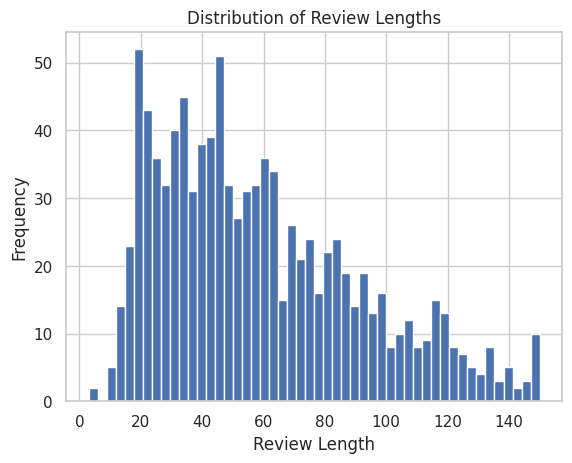

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

review_length = dataset['Review'].astype(str).apply(len)

plt.hist(review_length, bins=50)
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.title("Distribution of Review Lengths")
plt.show()


b) Positive vs Negative Review

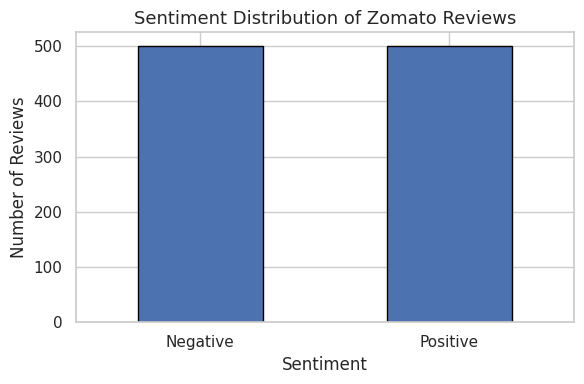

In [39]:
plt.figure(figsize=(6,4))
dataset.iloc[:, -1].value_counts().plot(
    kind='bar',
    edgecolor='black'
)

plt.xticks([0,1], ['Negative', 'Positive'], rotation=0)
plt.title("Sentiment Distribution of Zomato Reviews", fontsize=13)
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()



c) Confusion matrix using seaborn

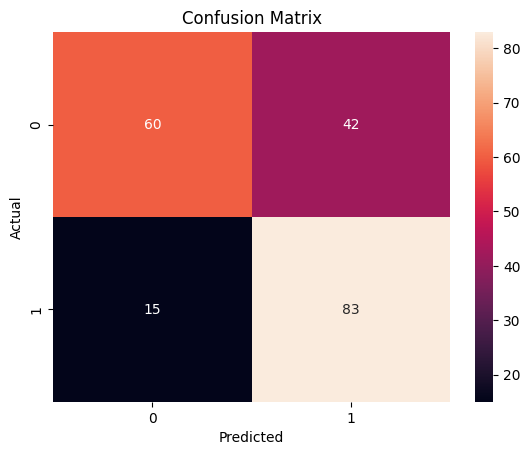

In [36]:
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
